In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

base_path = r"C:\Users\aligo\OneDrive\Desktop\210 Final Project\data"

# loading the datasets
hosts_2005_data     = pd.read_csv(base_path + r"\2005_hosts.csv")
total_hosts_data    = pd.read_csv(base_path + r"\total_hosts.csv")
changepoint_data    = pd.read_csv(base_path + r"\changepoint.csv")
# origin_anova_data was in utf-8 but gave an error, so it has been changed to latin1
origin_anova_data   = pd.read_csv(base_path + r"\origin_anova.csv", encoding="latin1") 
region_intros_data  = pd.read_csv(base_path + r"\region_intros.csv")
trade_intro_data    = pd.read_csv(base_path + r"\trade_intro_data.csv")

# printing the heads of each dataset
print("2005_hosts.csv")
print(hosts_2005_data.head(), "\n")

print("total_hosts.csv")
print(total_hosts_data.head(), "\n")

print("changepoint.csv")
print(changepoint_data.head(), "\n")

print("origin_anova.csv")
print(origin_anova_data.head(), "\n")


2005_hosts.csv
   General
0    Fruit
1    Fruit
2    Fruit
3  Grasses
4  Grasses 

total_hosts.csv
  General
0   Fruit
1   Fruit
2   Fruit
3   Fruit
4   Fruit 

changepoint.csv
   year  num_intro
0  1865          0
1  1866          0
2  1867          0
3  1868          1
4  1869          0 

origin_anova.csv
   obs            family                             species origin  year
0    1        Aclerdidae        Aclerda tokionis (Cockerell)    PAL  1900
1    2        Aclerdidae  Nipponaclerda biwakoensis (Kuwana)    ORI  2016
2    3  Asterolecaniidae     Asterodiaspis luteola (Russell)    PAL  1915
3    4  Asterolecaniidae       Asterodiaspis minorÊ(Russell)    PAL  1908
4    5  Asterolecaniidae   Asterodiaspis quercicola (Bouche)    PAL  1898 



In [2]:
print("region_intros.csv")
print(region_intros_data.head(), "\n")

print("trade_intro_data.csv")
print(trade_intro_data.head(), "\n")


region_intros.csv
   year       region  total_observations
0  1794  New England                   1
1  1828      Florida                   1
2  1838      Florida                   1
3  1859      Florida                   1
4  1868   California                   1 

trade_intro_data.csv
   year   quantity  num_intro
0  1967  2955923.7          2
1  1968  3113208.0          1
2  1969  3204477.6          0
3  1970  3427831.8          0
4  1971  3459956.9          1 



In [8]:
# cleaning changepoint_data, like making year numeric and changing colum name
changepoint_clean = changepoint_data.copy()
changepoint_clean["year"] = pd.to_numeric(changepoint_clean["year"], errors="coerce")
changepoint_clean["num_intro"] = pd.to_numeric(changepoint_clean["num_intro"], errors="coerce")
changepoint_clean = changepoint_clean.dropna(subset=["year"])
changepoint_clean = changepoint_clean.rename(columns={"num_intro": "num_intro_changepoint"})

print("changepoint_clean")
print(changepoint_clean.head(), "\n")


# cleaning trade_intro_data 
trade_clean = trade_intro_data.copy()
trade_clean["year"] = pd.to_numeric(trade_clean["year"], errors="coerce")
trade_clean["quantity"] = pd.to_numeric(trade_clean["quantity"], errors="coerce")
trade_clean["num_intro"] = pd.to_numeric(trade_clean["num_intro"], errors="coerce")
trade_clean = trade_clean.dropna(subset=["year"])
trade_clean = trade_clean.rename(columns={
    "quantity": "trade_quantity",
    "num_intro": "num_intro_trade"
})

print("trade_clean")
print(trade_clean.head(), "\n")


# cleaning region_intros_data 
region_clean = region_intros_data.copy()
region_clean["year"] = pd.to_numeric(region_clean["year"], errors="coerce")
region_clean["total_observations"] = pd.to_numeric(region_clean["total_observations"], errors="coerce")
region_clean = region_clean.dropna(subset=["year"])

# aggregating by year
region_year = (
    region_clean.groupby("year", as_index=False)
        .agg(
            n_regions=("region", "nunique"),
            total_region_observations=("total_observations", "sum"),
        )
)

print("region_year data")
print(region_year.head(), "\n")


changepoint_clean
   year  num_intro_changepoint
0  1865                      0
1  1866                      0
2  1867                      0
3  1868                      1
4  1869                      0 

trade_clean
   year  trade_quantity  num_intro_trade
0  1967       2955923.7                2
1  1968       3113208.0                1
2  1969       3204477.6                0
3  1970       3427831.8                0
4  1971       3459956.9                1 

region_year data
   year  n_regions  total_region_observations
0  1794          1                          1
1  1828          1                          1
2  1838          1                          1
3  1859          1                          1
4  1868          1                          1 



In [9]:
# merging changepoint and trade together
year_df = changepoint_clean.merge(trade_clean, on="year", how="left")

# merging region data
year_df = year_df.merge(region_year, on="year", how="left")

# adding engineered feature: decade
year_df["decade"] = (year_df["year"] // 10) * 10

print("YEAR-LEVEL ANALYTICAL TABLE")
print(year_df.head(), "\n")

# saving the year-level analytical table to a CSV file
year_df.to_csv(r"C:\Users\aligo\OneDrive\Desktop\210 Final Project\processed\year_level_table.csv", index=False)


YEAR-LEVEL ANALYTICAL TABLE
   year  num_intro_changepoint  trade_quantity  num_intro_trade  n_regions  \
0  1865                      0             NaN              NaN        NaN   
1  1866                      0             NaN              NaN        NaN   
2  1867                      0             NaN              NaN        NaN   
3  1868                      1             NaN              NaN        1.0   
4  1869                      0             NaN              NaN        NaN   

   total_region_observations  decade  
0                        NaN    1860  
1                        NaN    1860  
2                        NaN    1860  
3                        1.0    1860  
4                        NaN    1860   



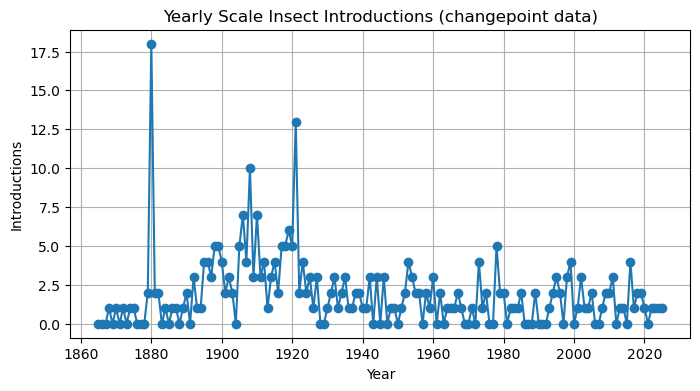

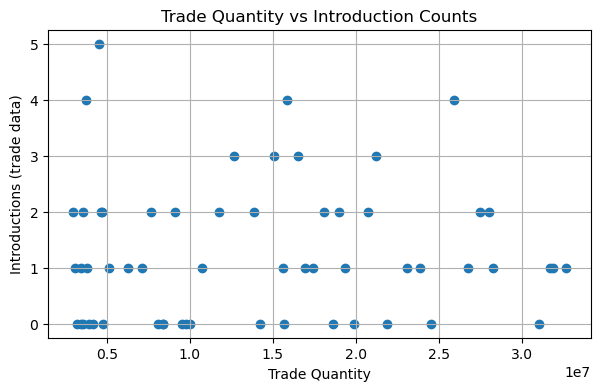

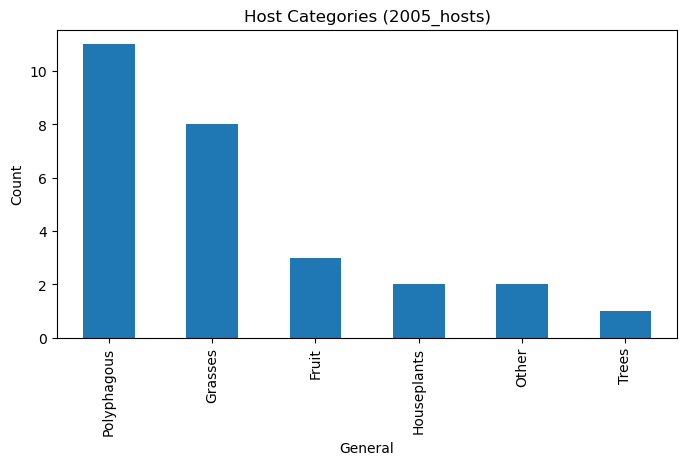

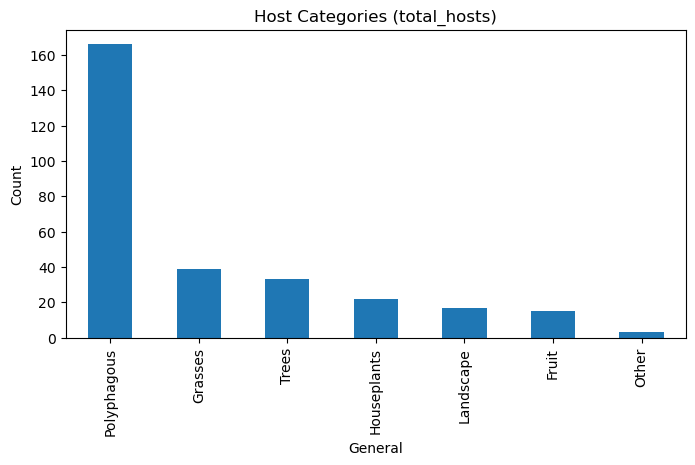

DESCRIPTIVE STATISTICS (year_df)
              year  num_intro_changepoint  trade_quantity  num_intro_trade  \
count   161.000000             161.000000    5.800000e+01        58.000000   
mean   1945.000000               1.888199    1.409633e+07         1.258621   
std      46.620811               2.296720    9.121826e+06         1.236298   
min    1865.000000               0.000000    2.955924e+06         0.000000   
25%    1905.000000               0.000000    4.855218e+06         0.000000   
50%    1945.000000               1.000000    1.328184e+07         1.000000   
75%    1985.000000               3.000000    2.053739e+07         2.000000   
max    2025.000000              18.000000    3.266293e+07         5.000000   

        n_regions  total_region_observations       decade  
count  119.000000                 119.000000   161.000000  
mean     1.756303                   2.554622  1940.496894  
std      0.982615                   2.331427    46.794781  
min      1.000000       

In [10]:
# Yearly introductions plot
plt.figure(figsize=(8,4))
plt.plot(year_df["year"], year_df["num_intro_changepoint"], marker="o")
plt.title("Yearly Scale Insect Introductions (changepoint data)")
plt.xlabel("Year")
plt.ylabel("Introductions")
plt.grid(True)
plt.show()


# Trade vs Introductions as a scatter plot
plt.figure(figsize=(7,4))
plt.scatter(year_df["trade_quantity"], year_df["num_intro_trade"])
plt.title("Trade Quantity vs Introduction Counts")
plt.xlabel("Trade Quantity")
plt.ylabel("Introductions (trade data)")
plt.grid(True)
plt.show()


# host plant category distribution from 2005 hosts data
if "General" in hosts_2005_data.columns:
    plt.figure(figsize=(8,4))
    hosts_2005_data["General"].value_counts().plot(kind="bar")
    plt.title("Host Categories (2005_hosts)")
    plt.ylabel("Count")
    plt.show()


# host plant category distribution from total hosts data
if "General" in total_hosts_data.columns:
    plt.figure(figsize=(8,4))
    total_hosts_data["General"].value_counts().plot(kind="bar")
    plt.title("Host Categories (total_hosts)")
    plt.ylabel("Count")
    plt.show()

# Basic statistics
print("DESCRIPTIVE STATISTICS (year_df)")
print(year_df.describe())


In [12]:
# merging changepoint and trade data on the year column
features_df = year_df.copy()

# adding region-based yearly summaries to the table
intro_median = features_df["num_intro_changepoint"].median()
features_df["high_risk"] = (features_df["num_intro_changepoint"] > intro_median).astype(int)

# creating a decade column by grouping years into 10-year ranges
features_df = features_df.sort_values("year")
features_df["lag_intro"] = features_df["num_intro_changepoint"].shift(1)

# calculating year-to-year trade growth percentage
features_df["trade_growth"] = features_df["trade_quantity"].pct_change()

# marking years as pre- or post-changepoint using the median year as a divider
changepoint_year = int(features_df["year"].median())
features_df["post_changepoint"] = (features_df["year"] > changepoint_year).astype(int)

print("Engineered feature columns added to features_df")
print(features_df[["year", "num_intro_changepoint", "trade_quantity",
                   "high_risk", "lag_intro", "trade_growth", "post_changepoint"]].head())



Engineered feature columns added to features_df
   year  num_intro_changepoint  trade_quantity  high_risk  lag_intro  \
0  1865                      0             NaN          0        NaN   
1  1866                      0             NaN          0        0.0   
2  1867                      0             NaN          0        0.0   
3  1868                      1             NaN          0        0.0   
4  1869                      0             NaN          0        1.0   

   trade_growth  post_changepoint  
0           NaN                 0  
1           NaN                 0  
2           NaN                 0  
3           NaN                 0  
4           NaN                 0  


C:\Users\aligo\AppData\Local\Temp\ipykernel_36784\727401017.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  features_df["trade_growth"] = features_df["trade_quantity"].pct_change()


In [ ]:
import sqlite3

# creating a SQLite database file to store our table
conn = sqlite3.connect(r"C:\Users\aligo\OneDrive\Desktop\210 Final Project\database\insect_risk.db")

# saving the engineered features_df table into the database as "year_data"
features_df.to_sql("year_data", conn, if_exists="replace", index=False)

# SQL query: compute decade averages for introductions and trade
sql_query = """
SELECT
    decade,
    AVG(num_intro_changepoint) AS avg_intros,
    AVG(trade_quantity)        AS avg_trade,
    COUNT(*)                   AS n_years
FROM year_data
GROUP BY decade
ORDER BY decade;
"""

# running the SQL query and loading the results as a DataFrame
sql_summary = pd.read_sql_query(sql_query, conn)
conn.close()

# printing summary statistics calculated through SQL
print("SQL summary by decade using from SQLite")
print(sql_summary)

SQL summary by decade using from SQLite
    decade  avg_intros    avg_trade  n_years
0     1860    0.200000          NaN        5
1     1870    0.600000          NaN       10
2     1880    2.600000          NaN       10
3     1890    2.800000          NaN       10
4     1900    4.000000          NaN       10
5     1910    4.000000          NaN       10
6     1920    3.300000          NaN       10
7     1930    1.800000          NaN       10
8     1940    1.300000          NaN       10
9     1950    1.700000          NaN       10
10    1960    1.100000   3091203.10       10
11    1970    1.500000   3894173.23       10
12    1980    0.900000   6964256.52       10
13    1990    1.500000  12354293.13       10
14    2000    1.100000  17713069.81       10
15    2010    1.600000  24346745.41       10
16    2020    0.833333  31117636.46        6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

# removing rows that are missing any of the key engineered features
model_df = features_df.dropna(subset=["trade_quantity", "n_regions", "lag_intro", "trade_growth", "high_risk"])

# predicting year-level introductions using linear regression

# selecting predictor columns for regression
X_reg = model_df[["trade_quantity", "n_regions", "lag_intro", "trade_growth"]]

# selecting the target variable (yearly introductions)
y_reg = model_df["num_intro_changepoint"]

# splitting data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# fitting a linear regression model to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)

# making predictions on the test set
y_reg_pred = lin_reg.predict(X_reg_test)

# computing RMSE manually (Square root of MSE)
mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = mse ** 0.5


print("Linear Regression")
print("RMSE on test set:", reg_rmse, "\n")


# classify high-risk years using logistic regression

# selecting predictors for classification of high-risk years
X_clf = model_df[["trade_quantity", "n_regions", "lag_intro", "trade_growth", "post_changepoint"]]
# selecting binary target variable with 0 = low risk and 1 = high risk
y_clf = model_df["high_risk"]

# splitting data into training and testing sets
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# fitting logistic regression for high-risk classification
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_clf_train, y_clf_train)

# predictions on the test set
y_clf_pred = log_reg.predict(X_clf_test)

# computing evaluation metrics for accuracy and F1 score
clf_acc = accuracy_score(y_clf_test, y_clf_pred)
clf_f1 = f1_score(y_clf_test, y_clf_pred)

print("Logistic Regression for High-Risk Classification")
print("Accuracy on test set:", clf_acc)
print("F1 score on test set:", clf_f1, "\n")


# grouping years by ecological/trade profile using KMeans clustering

# selecting features used for clustering years
X_cluster = model_df[["trade_quantity", "num_intro_changepoint", "n_regions"]]

# creating a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_cluster)

# adding cluster labels back into the dataset
model_df["cluster"] = kmeans.labels_

print("KMeans Clustering")
print(model_df[["year", "trade_quantity", "num_intro_changepoint", "n_regions", "cluster"]].head(), "\n")


# finding years similar to a given year using KNN similarity

# selecting features to define similarity between years
knn_features = model_df[["trade_quantity", "num_intro_changepoint", "n_regions"]]

# initializing a KNN model to find nearest neighbors
knn = NearestNeighbors(n_neighbors=4)  
knn.fit(knn_features)

# choosing the last available year as the reference point
ref_idx = knn_features.index[-1]
ref_vector = knn_features.loc[ref_idx].values.reshape(1, -1)

# finding the closest matching years
distances, indices = knn.kneighbors(ref_vector)

print("KNN Similarity for years similar to the last available year")
for dist, idx in zip(distances[0], indices[0]):
    year_value = model_df.loc[knn_features.index[idx], "year"]
    print(f"Year {year_value}, distance {dist:.3f}")


Linear Regression
RMSE on test set: 1.0035492683385971 

Logistic Regression for High-Risk Classification
Accuracy on test set: 0.5
F1 score on test set: 0.5714285714285714 

KMeans Clustering
     year  trade_quantity  num_intro_changepoint  n_regions  cluster
103  1968       3113208.0                      1        1.0        2
106  1971       3459956.9                      1        1.0        2
108  1973       3742960.4                      4        2.0        2
109  1974       3800388.8                      1        1.0        2
110  1975       3576949.8                      2        2.0        2 

=== KNN Similarity (years similar to the last available year) ===
Year 2024, distance 0.000
Year 2023, distance 763705.700
Year 2022, distance 957369.800
Year 2020, distance 4392122.600


c:\Users\aligo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aligo\AppData\Local\Temp\ipykernel_36784\1678253715.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["cluster"] = kmeans.labels_
c:\Users\aligo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Logistic Regression Coefficients for Feature Importance
trade_quantity: -0.0000
n_regions: 0.7526
lag_intro: -0.0208
trade_growth: 0.0092
post_changepoint: 0.1374


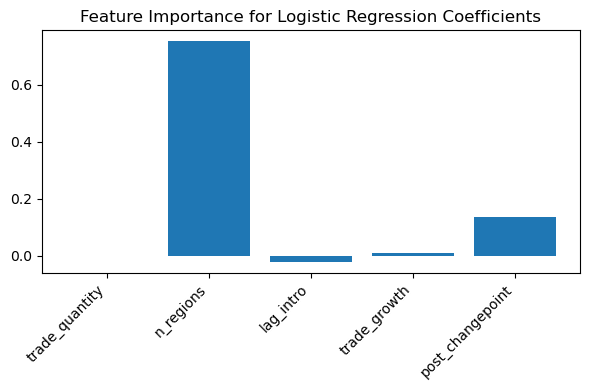

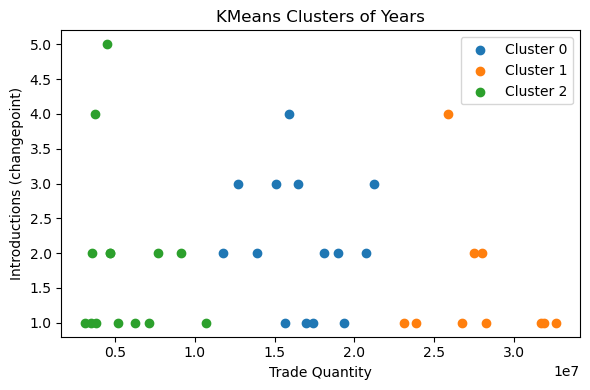

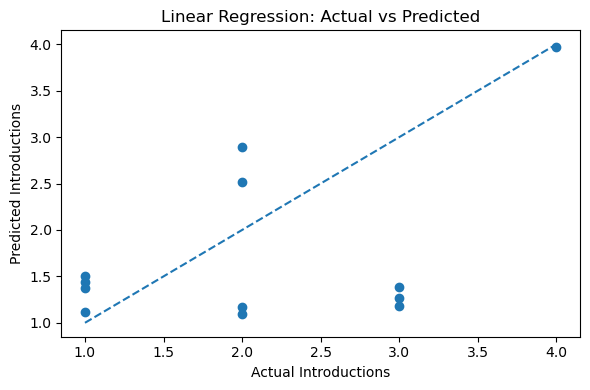

In [ ]:
# feature importance from logistic regression for coefficients
feature_names = X_clf.columns
coef_values = log_reg.coef_[0]

print("Logistic Regression Coefficients for Feature Importance")
for name, coef in zip(feature_names, coef_values):
    print(f"{name}: {coef:.4f}")

# simple bar plot of coefficients
plt.figure(figsize=(6,4))
plt.bar(feature_names, coef_values)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance for Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

#  trade vs introductions colored by cluster visualization
plt.figure(figsize=(6,4))
for cluster_id in sorted(model_df["cluster"].unique()):
    subset = model_df[model_df["cluster"] == cluster_id]
    plt.scatter(subset["trade_quantity"], subset["num_intro_changepoint"], label=f"Cluster {cluster_id}")

plt.xlabel("Trade Quantity")
plt.ylabel("Introductions (changepoint)")
plt.title("KMeans Clusters of Years")
plt.legend()
plt.tight_layout()
plt.show()


# linear regression for predicted vs actual introductions 
 
plt.figure(figsize=(6,4))
plt.scatter(y_reg_test, y_reg_pred)
plt.plot([y_reg_test.min(), y_reg_test.max()],
         [y_reg_test.min(), y_reg_test.max()],
         linestyle="--")
plt.xlabel("Actual Introductions")
plt.ylabel("Predicted Introductions")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()
